# Yulu


Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

# Business Problem

They want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

- How well those variables describe the electric cycle demands.

In [94]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot


In [36]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 31.6MB/s]


In [37]:
# Loading the dataset
data= pd.read_csv('/content/bike_sharing.csv')

In [38]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [39]:
data.shape

(10886, 12)

In [40]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [41]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Column Description:

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
  1. Clear, Few clouds, partly cloudy, partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

In [42]:
# converting datetime from object to datetime
data['datetime'] = pd.to_datetime(data['datetime'])
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [49]:
# Creating new columns from datetime and converting them to categories

data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour

In [43]:
# Checking missing values
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no minning values in the dataset

In [44]:
# Checking for Duplicate Values
data.duplicated().sum()

0

All rows are unique

In [45]:
# checking for unique values in each column

for col in data.columns:
  print(f"{col}: {data[col].nunique()}")


datetime: 10886
season: 4
holiday: 2
workingday: 2
weather: 4
temp: 49
atemp: 60
humidity: 89
windspeed: 28
casual: 309
registered: 731
count: 822


## Observation
From the above we can infer that:
- season, holiday, workingday and weather are categorical values.
- Remaining columns are continuous variables.

In [46]:
# converting the categorical columns into category

cat_col = ['season', 'holiday', 'workingday', 'weather']

for col in cat_col:
  data[col] = data[col].astype('category')
data.dtypes


datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [50]:
# replacing the number with category

# change of season
data['season'] = data['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

# change of holiday
data['holiday'] = data['holiday'].replace({0:'No',1:'Yes'})

# change of workingday
data['workingday'] = data['workingday'].replace({0:'No',1:'Yes'})

# change of month
data['month'] = data['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})

In [51]:
data.describe()

,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,9.992559,11.541613
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,5.476608,6.915838
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,5.000000,6.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,10.000000,12.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,15.000000,18.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,19.000000,23.000000


In [53]:
data.describe(include = 'category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,Winter,No,Yes,1
freq,2734,10575,7412,7192


## Outlier Detection

In [ ]:
cat_col= list(data.dtypes[data.dtypes == 'category'].index)

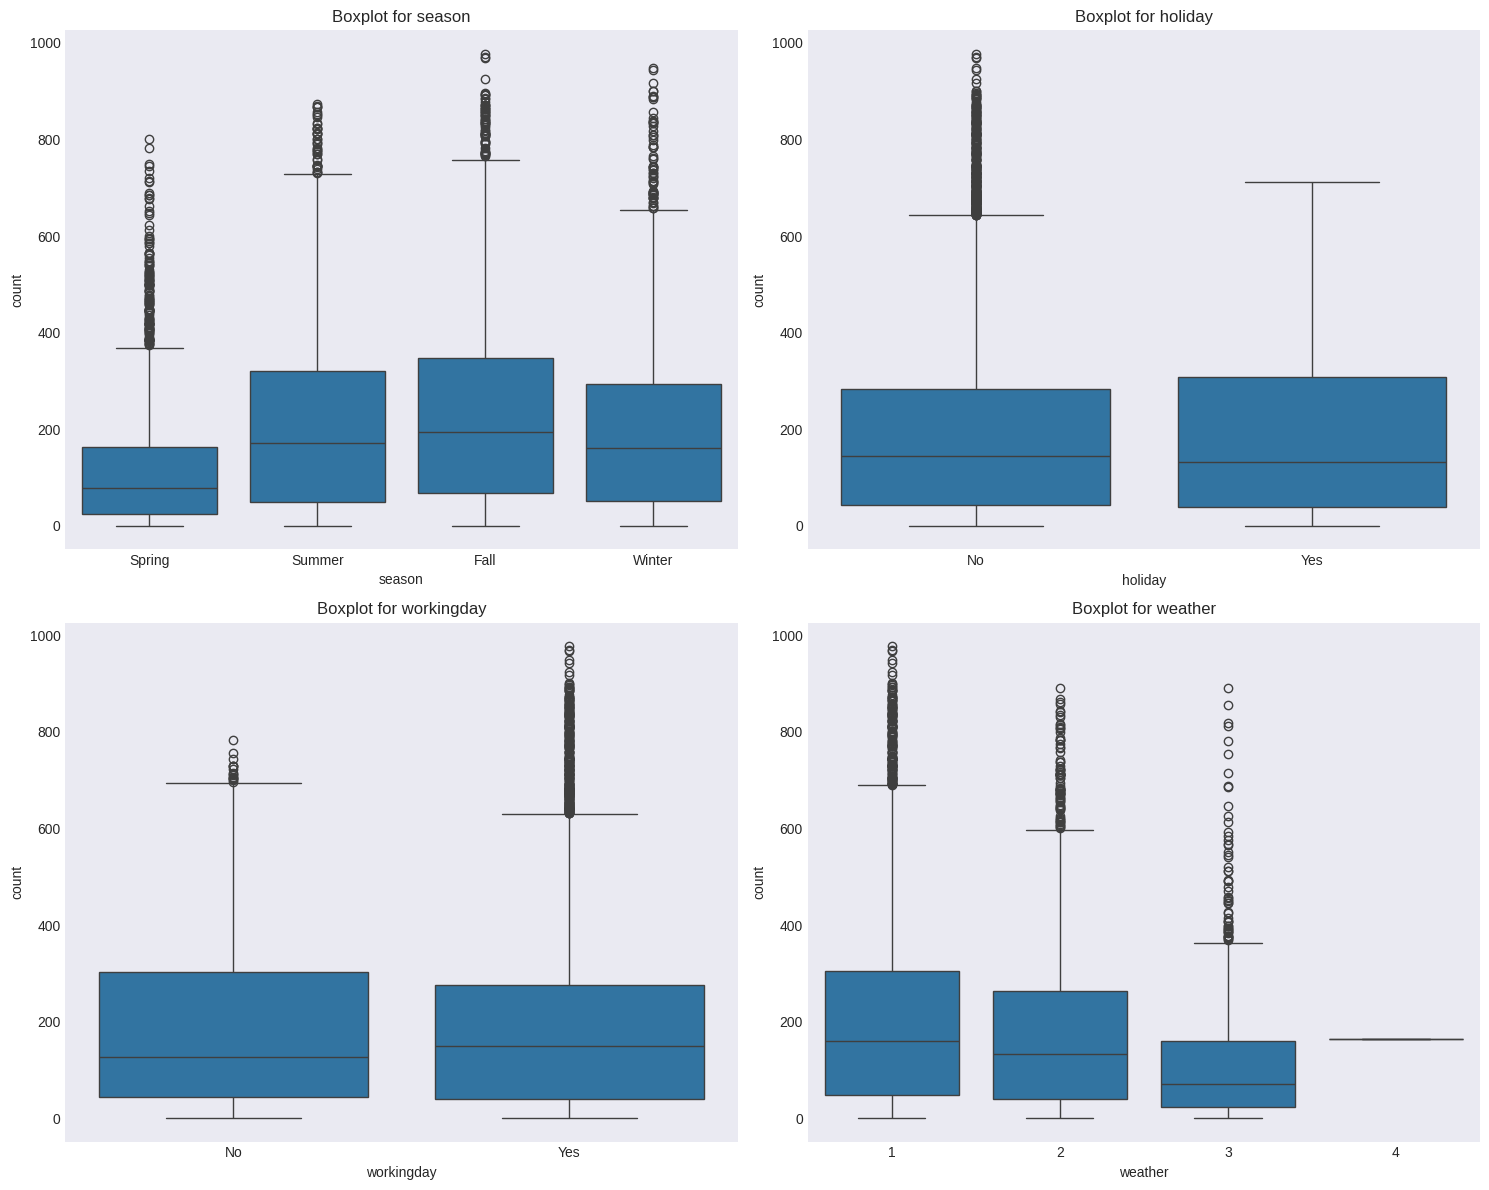

In [61]:
plt.figure(figsize=(15, 12))

for i, column in enumerate(cat_col,1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=column, y='count', data=data)
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()


## Observation
- Spring and Winter seasons have more outliers than the rest 2 seasons.
- Category 3 weather has a lot of unusual values, while category 4 weather doesn't have any
- Working day more unusual values/ outliers than non-working/holidays

## Univariate Analysis

In [62]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

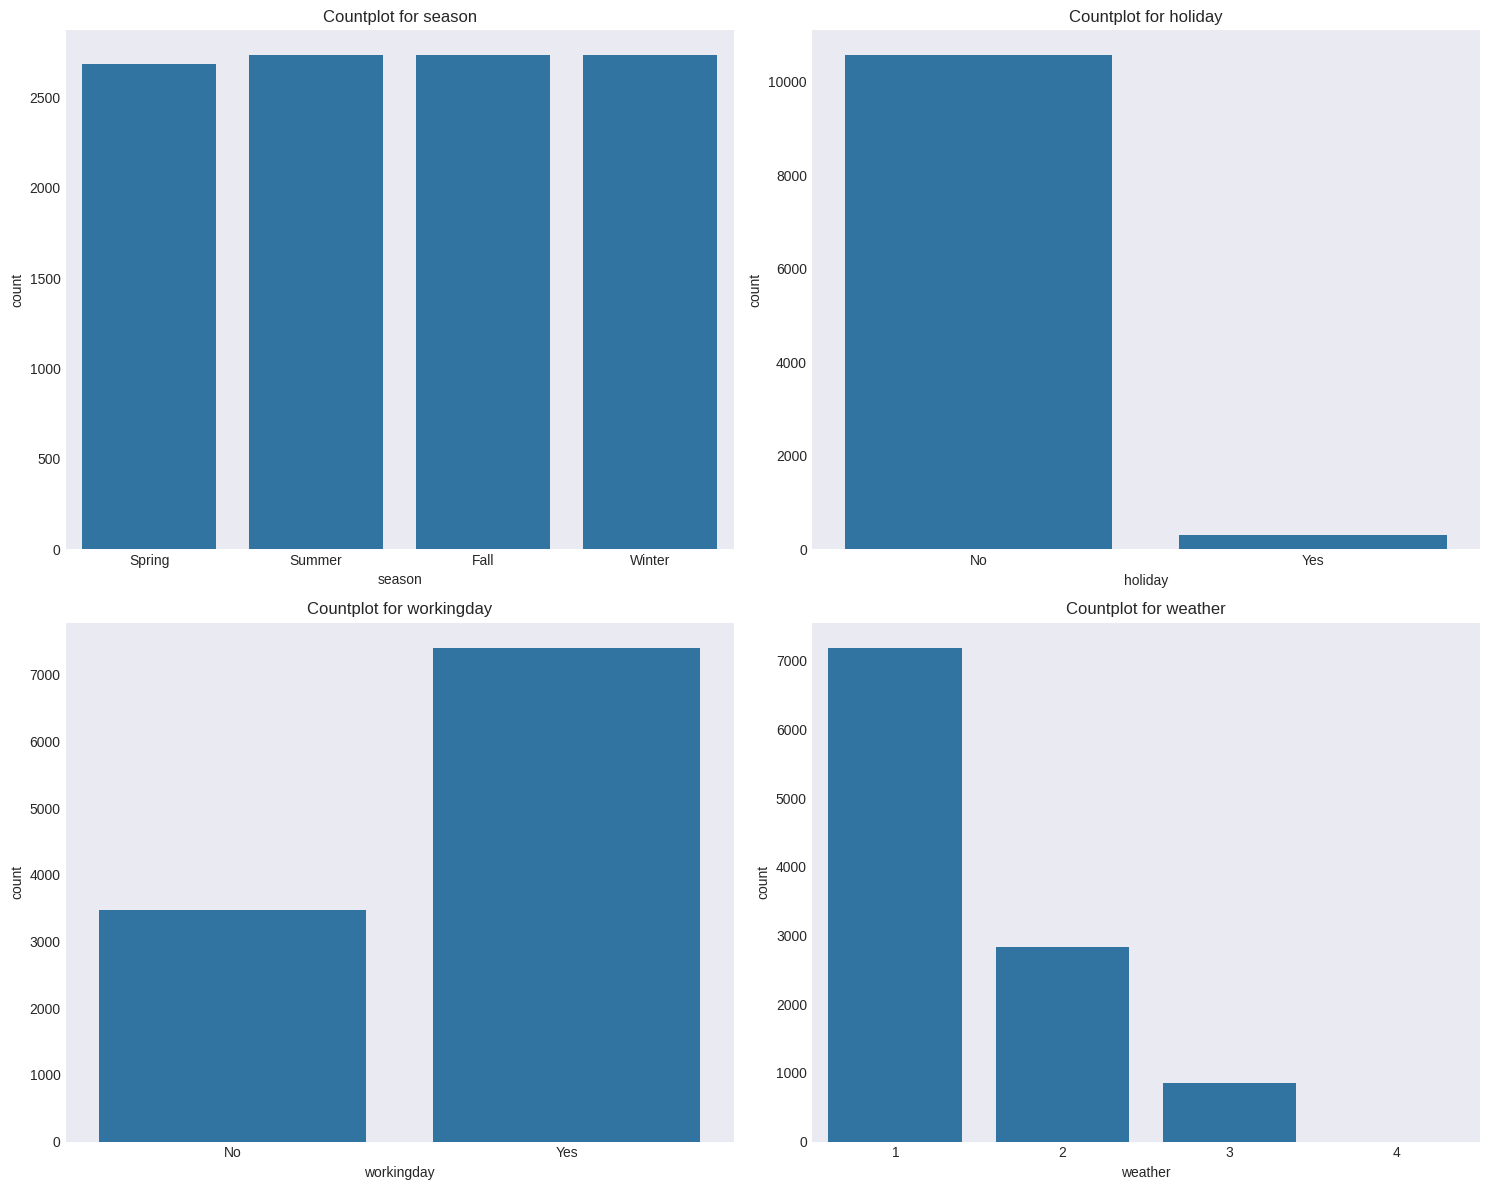

In [69]:
plt.figure(figsize=(15, 12))

for i, column in enumerate(cat_col,1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column,data=data)
    plt.title(f'Countplot for {column}')

plt.tight_layout()
plt.show()


### Observations
- The seasons are roughly equal in proportion.
- There is a huge data imbalance in holiday showing that people do not use the vehicles in holidays.
- There is a huge data imbalance in workingday showing that people use the vehicles mostly in working days.
- Weather conditions 3 and 4 (Light Snow, Light Rain, Heavy Rain) shows least number of vehicle usage. Whereas weather condition 1 (Clear, Few clouds, partly cloudy, partly cloudy) has the highest number of vehicle usuage.

<Figure size 1500x800 with 0 Axes>

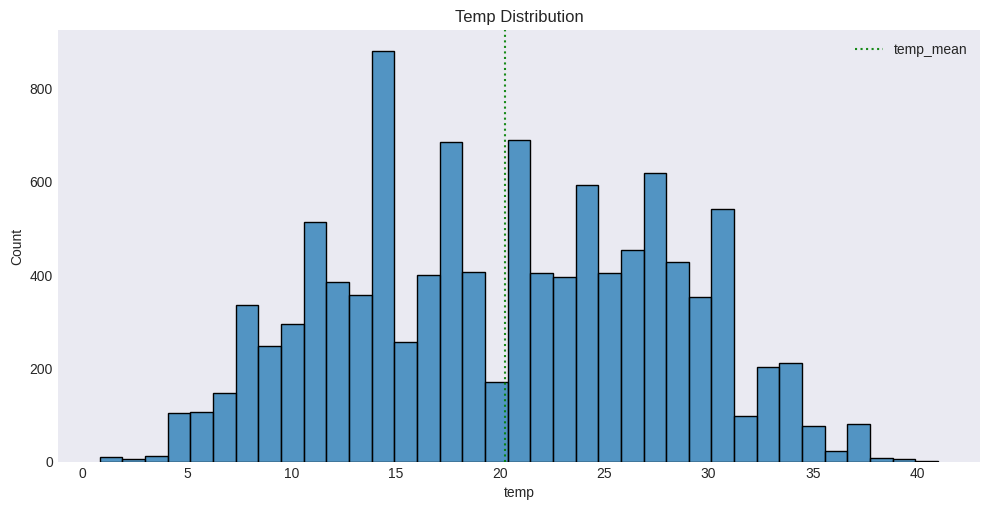

,Statistic,Value
0,count,10886.00000
1,mean,20.23086
2,std,7.79159
3,min,0.82000
4,25%,13.94000
5,50%,20.50000
6,75%,26.24000
7,max,41.00000


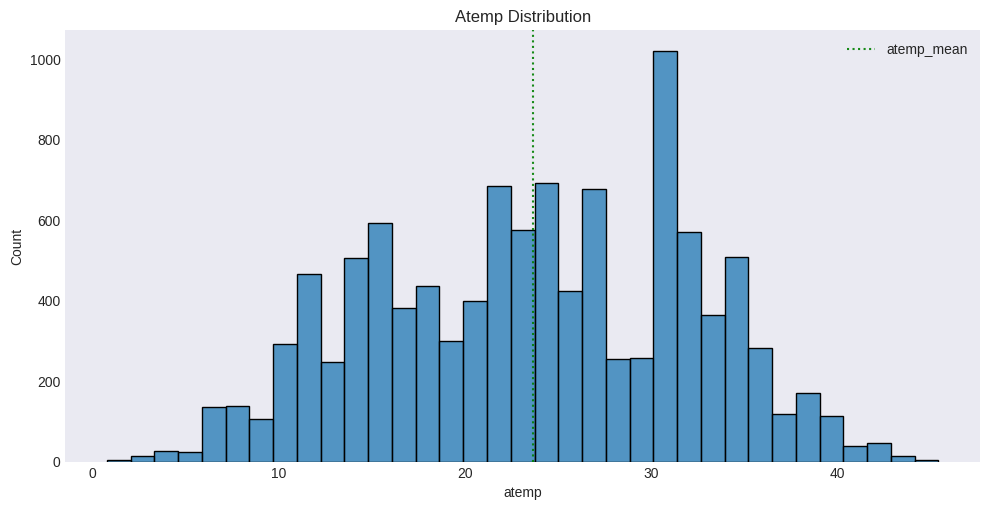

,Statistic,Value
0,count,10886.000000
1,mean,23.655084
2,std,8.474601
3,min,0.760000
4,25%,16.665000
5,50%,24.240000
6,75%,31.060000
7,max,45.455000


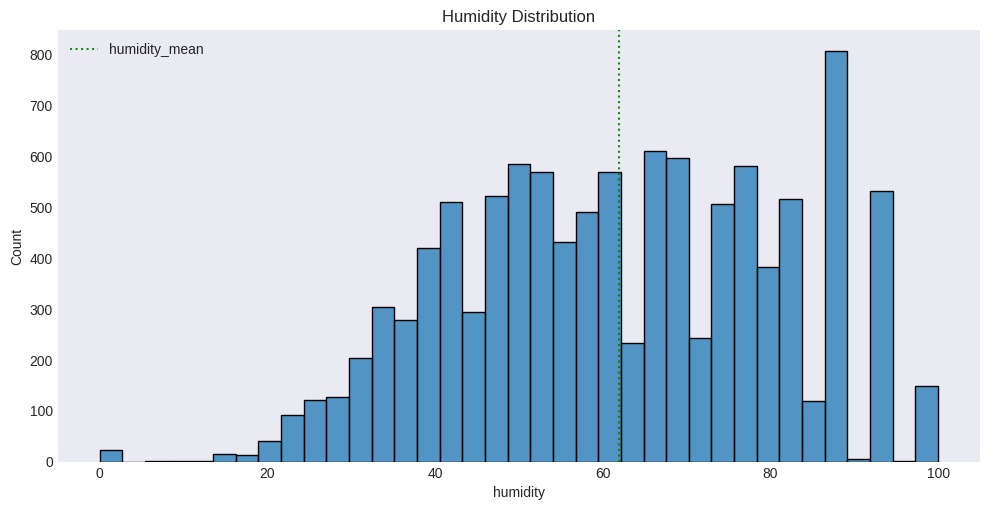

,Statistic,Value
0,count,10886.000000
1,mean,61.886460
2,std,19.245033
3,min,0.000000
4,25%,47.000000
5,50%,62.000000
6,75%,77.000000
7,max,100.000000


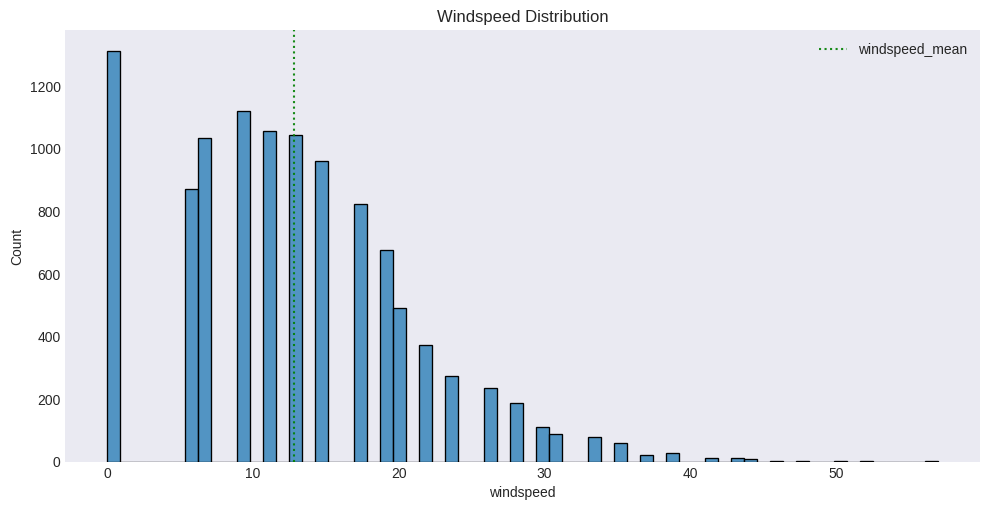

,Statistic,Value
0,count,10886.000000
1,mean,12.799395
2,std,8.164537
3,min,0.000000
4,25%,7.001500
5,50%,12.998000
6,75%,16.997900
7,max,56.996900


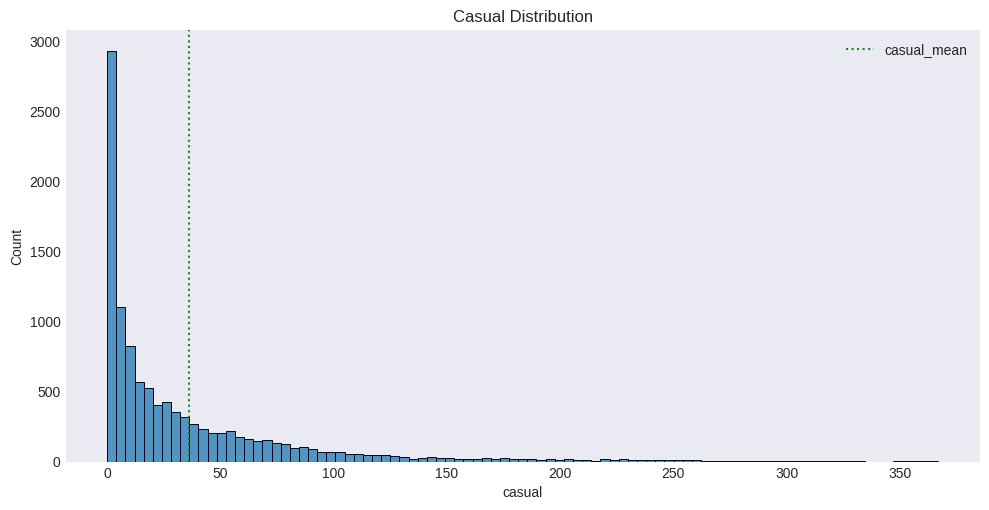

,Statistic,Value
0,count,10886.000000
1,mean,36.021955
2,std,49.960477
3,min,0.000000
4,25%,4.000000
5,50%,17.000000
6,75%,49.000000
7,max,367.000000


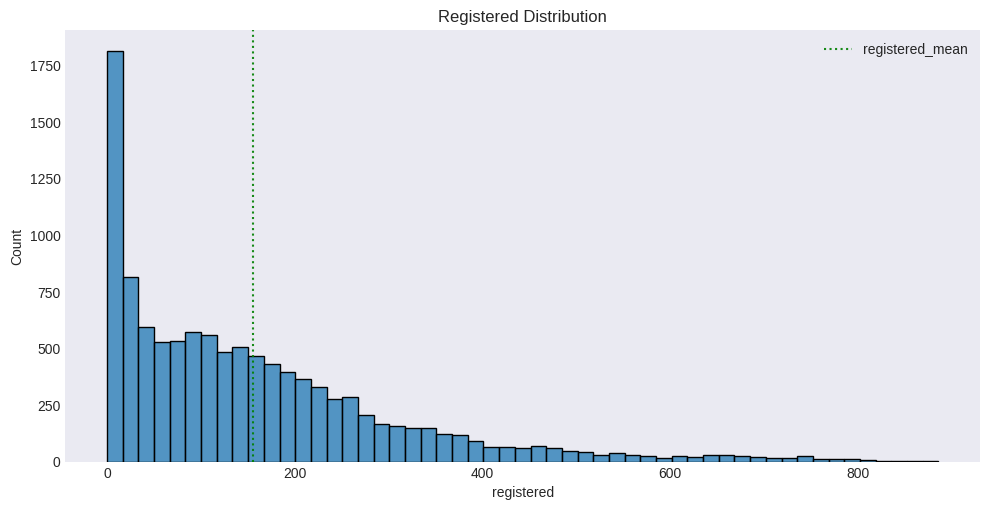

,Statistic,Value
0,count,10886.000000
1,mean,155.552177
2,std,151.039033
3,min,0.000000
4,25%,36.000000
5,50%,118.000000
6,75%,222.000000
7,max,886.000000


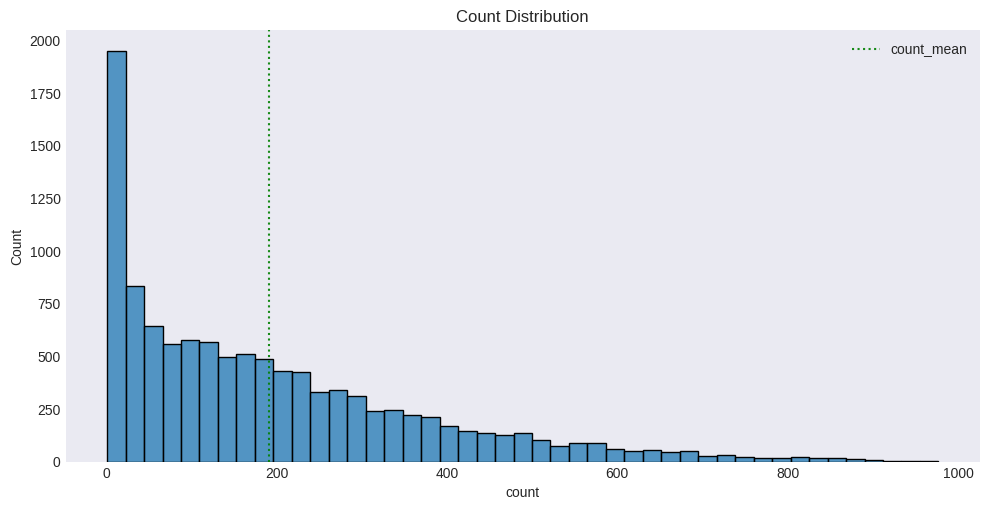

,Statistic,Value
0,count,10886.000000
1,mean,191.574132
2,std,181.144454
3,min,1.000000
4,25%,42.000000
5,50%,145.000000
6,75%,284.000000
7,max,977.000000


In [75]:
columns= ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
plt.figure(figsize=(15,8))
for col in columns:
  # distribution plot
  sns.displot(data=data, x=col, aspect=2)
  plt.axvline(x=data[col].mean(), linestyle=":", color='g', label=f"{col}_mean", alpha=0.9)
  plt.legend()
  plt.title(f'{col.title()} Distribution')
  plt.show()

  # tabular data
  tabular_data = data[col].describe().reset_index()
  tabular_data.columns = ['Statistic', 'Value']
  display(tabular_data)


### Observations
- temp
  - Average temperature is around 20.23 degrees Celsius.
  - Max temp is 41 degree Celsius and min temp is 0.82 degree Celsius
- atemp
  - The column displays a wide range of apparent temperatures (0.76 to 45.455), with a mean of approximately 23.65 and moderate variability around the median of 24.24.
- humidity
  - The 'humidity' column depicts a range of humidity values (0 to 100), with an average around 61.89. The distribution shows moderate variability, from 47 at the 25th percentile to 77 at the 75th percentile, indicating diverse humidity levels in the dataset.
- windspeed

  - The 'windspeed' column displays a range of wind speeds from 0 to 56.9979, with a mean of approximately 12.80.
- casual

  - The 'casual' column demonstrates a broad range of casual bike rental counts, with values spanning from 0 to 367.
  - The distribution is positively skewed, as indicated by the mean (36.02) being less than the median (17.0).
- registered

  - The 'registered' column showcases a diverse range of registered bike rental counts, ranging from 0 to 886.
  - The distribution is positively skewed, evidenced by the mean (155.55) being less than the median (118.0).
- count

  - The 'count' column reveals a wide range of total bike rental counts, varying from 1 to 977.
  - The distribution is positively skewed, with a mean (191.57) greater than the median (145.0), indicating a concentration of lower values


## Bivariate Analysis

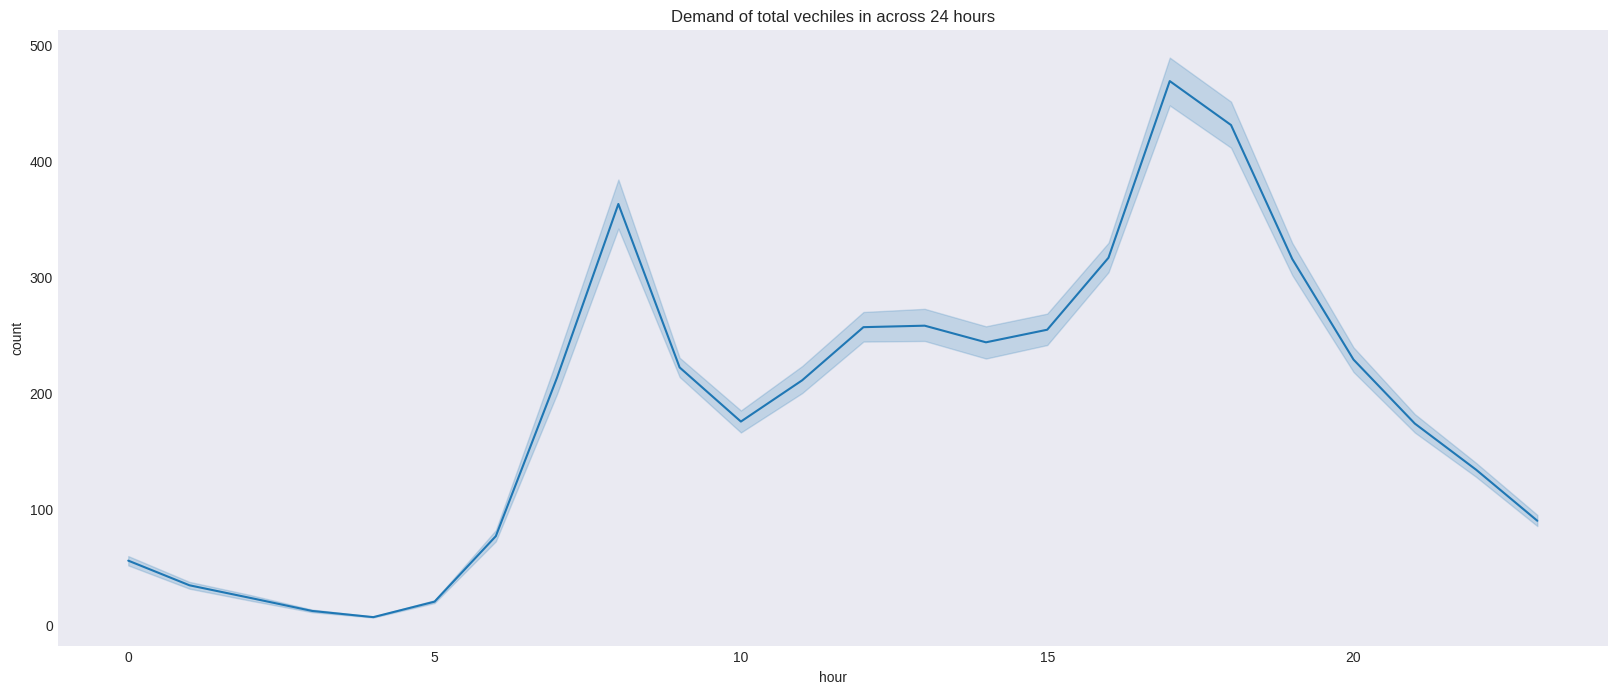

In [77]:
plt.figure(figsize=(20,8))

sns.lineplot(x="hour", y="count", data=data)
plt.title("Demand of total vechiles in across 24 hours")
plt.show()

## Observations
- The highest peak demand can be seen from 17-19 hour period.
- Second highest peak in demand can be seen from 7-9 hour period.

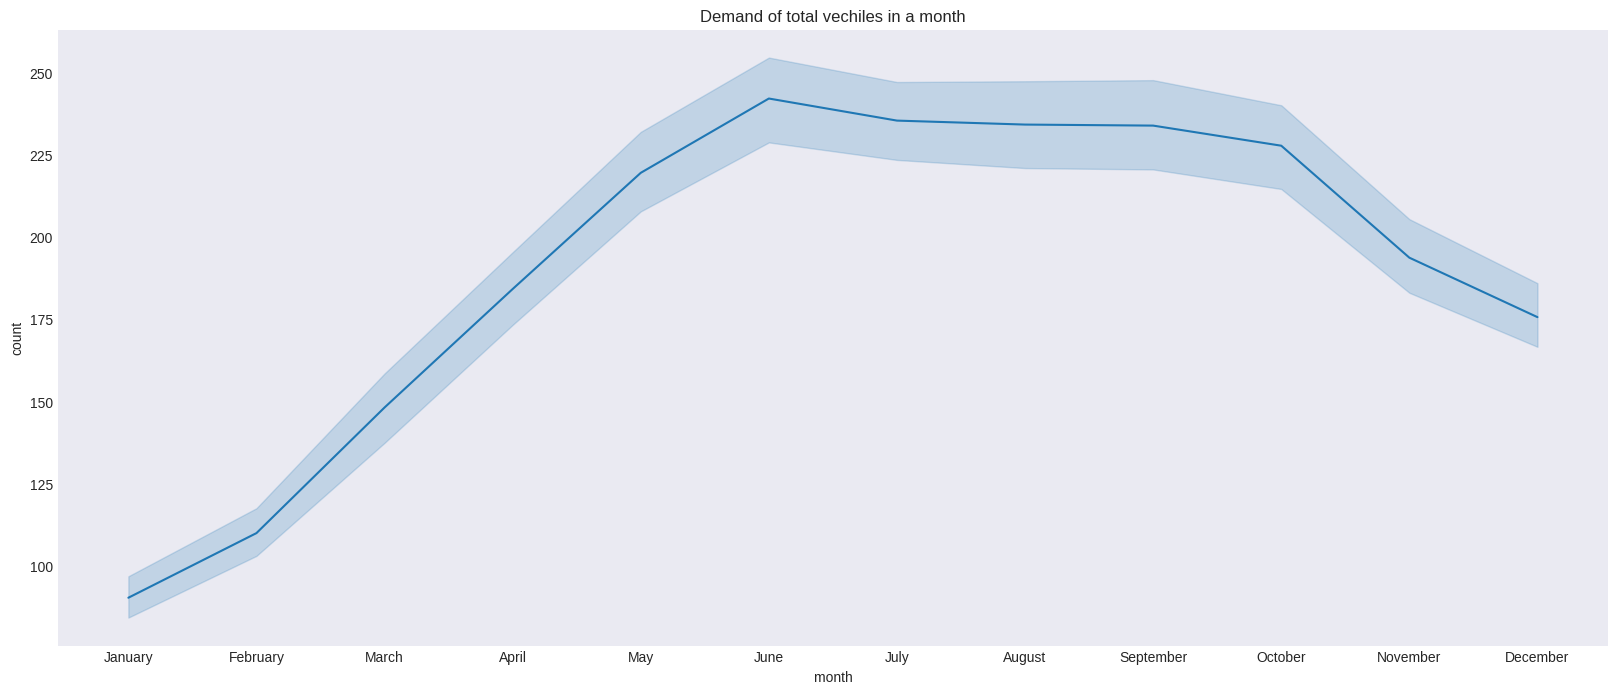

In [78]:

plt.figure(figsize=(20,8))

sns.lineplot(x="month", y="count", data=data)
plt.title("Demand of total vechiles in a month")
plt.show()

### Observations
- Steady vehicle demand is from June to October
- From November to January, the demand is reducing.
- From February to July demand is increasing.

<Figure size 2000x800 with 0 Axes>

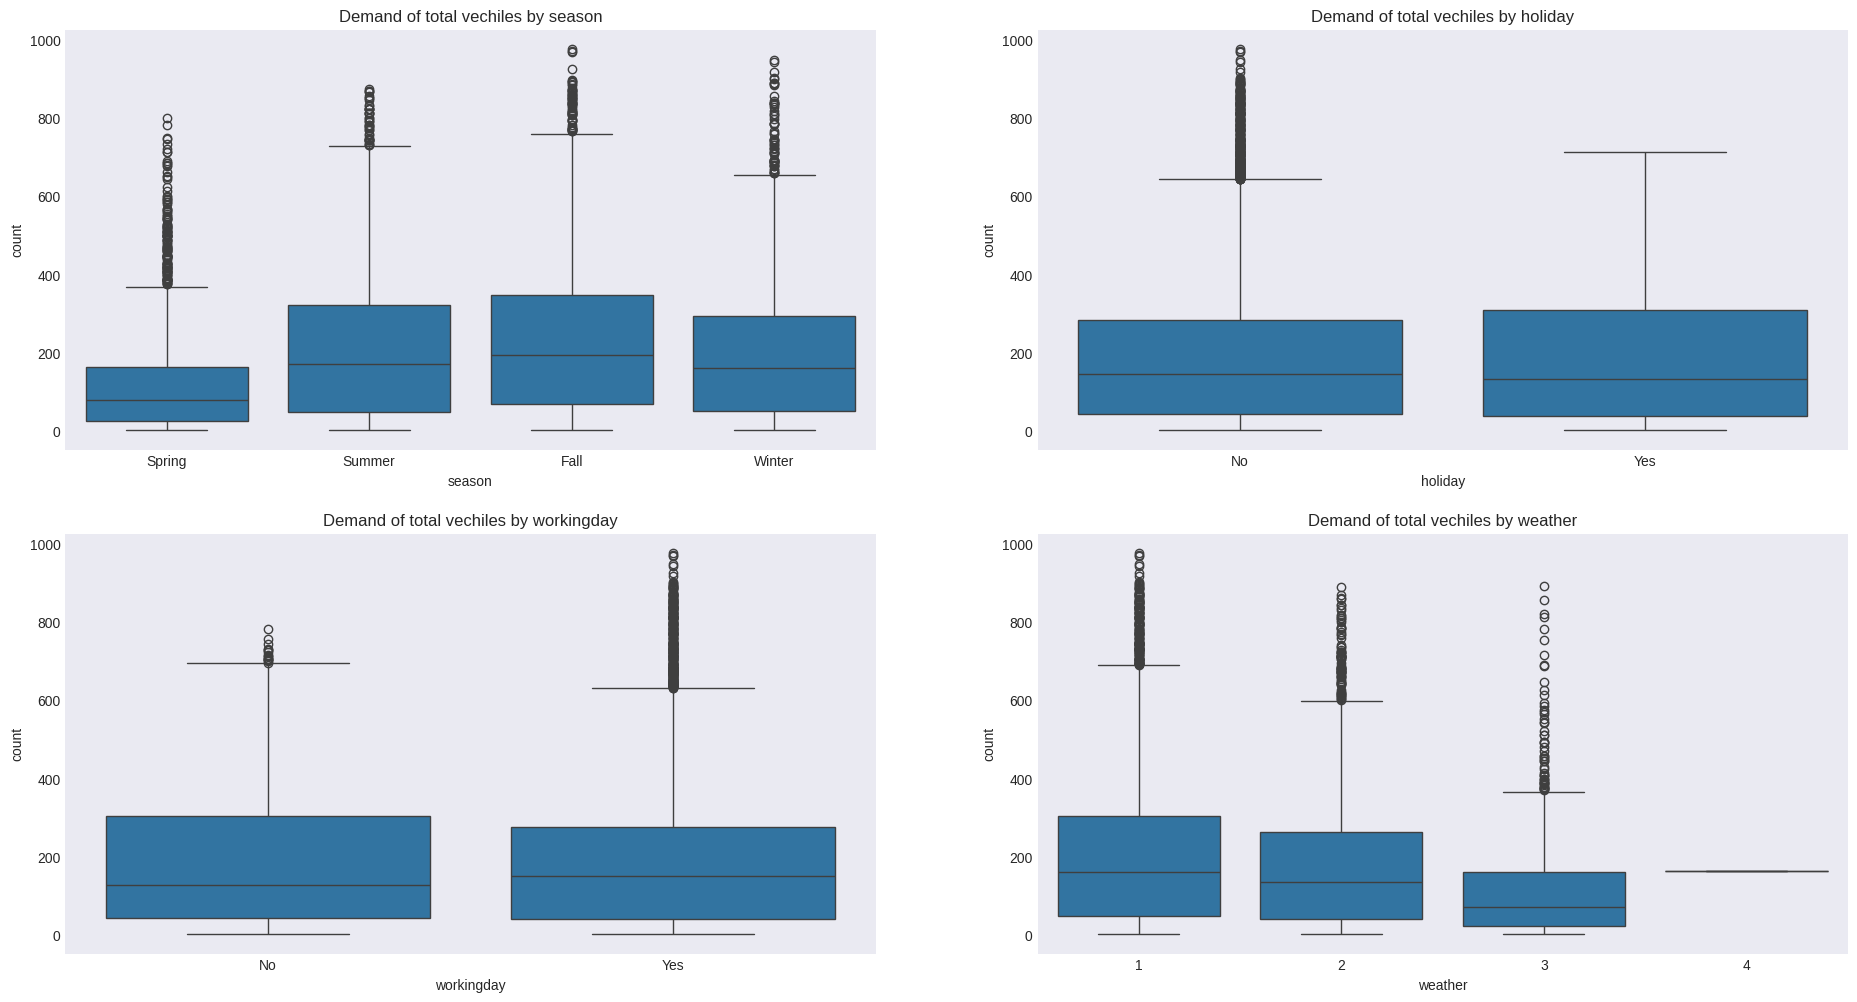

In [121]:
plt.figure(figsize=(20,8))


fig, ax = plt.subplots(2, 2, figsize=(23, 12))
axes = ax.ravel()

for index, column in enumerate(cat_col):
    sns.boxplot(data=data, x=column, y="count", ax=axes[index])
    axes[index].set_title(f"Demand of total vechiles by {column}", )
plt.show()

### Observations
- season
  - Median value of summer, fall and winter are nearly the same.
  - Median value of sprig is less than the rest of the 3 seasons.
  - Fall season has the largest variance for total count.
- holiday
  - Median count for holiday and non-holiday is the same.
  - Holiday do not have any outliers, whereas we see ouliers for non-holiday days.
- workingday
  - Difference between median value for working and non-working day is very less with the median of working day is slightly higher than the non-working day.
  - Outliers can be seen in both working and non-working days.
- weather
  - For weather condition 1 and 2, the meadian value is nearly identical.
  - Outliers are present for all conditionsexcept for weather condition 4.
  - Variance of weather condition is teh highest across the total count.

### Correlation Analysis

<Axes: >

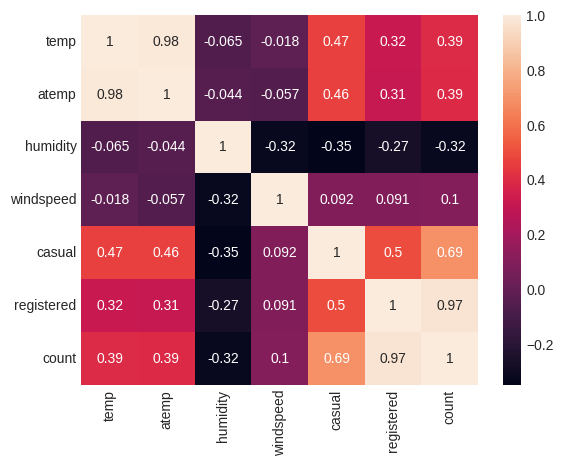

In [83]:
columns= ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
sns.heatmap(data[columns].corr(), annot= True)

### Observations
- atemp:

  - Strong positive correlation with 'temp' (0.98)
  - Moderate positive correlation with 'casual' (0.46) and 'registered' (0.31).
  - Moderate positive correlation with 'count' (0.39)
- temp

  - Highly correlated with 'atemp' (0.98), indicating a strong connection.
  - Moderate positive correlation with 'casual' (0.47) and 'registered' (0.32).
  - Positive correlation with 'count' (0.39)
- humidity:

  - Weak negative correlation with 'atemp' (-0.04) and 'temp' (-0.06).
  - Moderate negative correlation with 'casual' (-0.35), 'registered' (-0.27), and 'count' (-0.32).
  - Indicates a tendency for fewer bike rentals during higher humidity.
- windspeed:

  - Weak negative correlation with 'atemp' (-0.06) and 'temp' (-0.02).
  - Weak positive correlation with 'casual' (0.09), 'registered' (0.09), and 'count' (0.10).
  - Suggests a subtle influence on bike rentals with increasing wind speed.
- casual:

  - Strong positive correlation with 'atemp' (0.46) and 'temp' (0.47).
  - Moderate negative correlation with 'humidity' (-0.35) and positive correlation with 'windspeed' (0.09).
  - Highly correlated with 'registered' (0.50) and 'count' (0.69)
- registered:

  - Positive correlation with 'atemp' (0.31) and 'temp' (0.32).
  - Negative correlation with 'humidity' (-0.27) and positive correlation with 'windspeed' (0.09).
  - Highly correlated with 'casual' (0.50) and 'count' (0.97)
- count :

 - Positive correlation with 'atemp' (0.39), 'temp' (0.39), and 'casual' (0.69).
 - Negative correlation with 'humidity' (-0.32).
 - Highly correlated with 'registered' (0.97)

## Hypothesis Testing

### Demand of bicycles on rent is the same on Weekdays & Weekends
- Here we will perform 2 sample independent t-test
### Assumptions for t-test
  - Data should b normally distributed
  - Variances of the 2 samples should be equal


#### Testing for data normality

In [89]:

weekdays= data[data['workingday']=='Yes']['count']
weekends= data[data['workingday']=='No']['count']

#### Shapiro Test for checking normality
- H0: Data is normally distributed
- Ha: Data is not normally distributed
- alpha= 0.05

In [93]:
stat, p_value= stats.shapiro(data.sample(80)['count'])
if p_value > 0.05:
  print('Data is normally distributed')
else:
  print('Data is not normally distributed')

Data is not normally distributed


#### Data normality using Q-Q plot


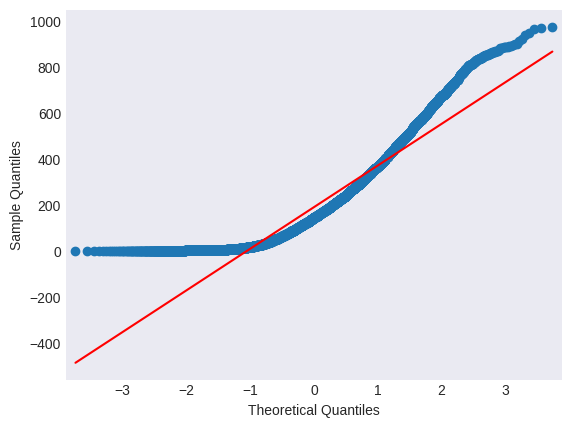

In [96]:
qqplot(data['count'], line = 's')
plt.show()

- Since most of the points are not falling on the line, the data is not normally distributed

#### Testing for Homogenity for variance using Leven's test
- H0: Variance of the samples are equal
- Ha: Variance of teh samples are not equal

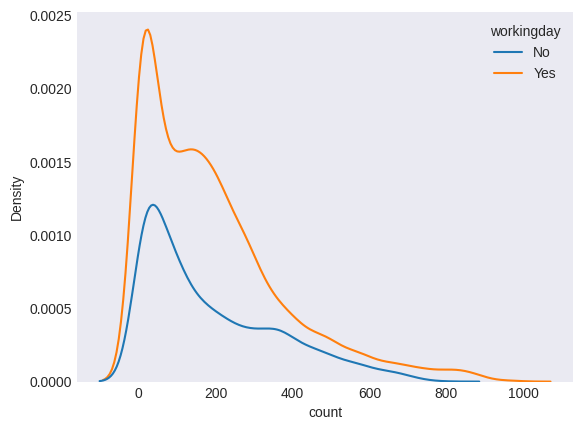

In [118]:
sns.kdeplot(data = data, x = 'count', hue = 'workingday')
plt.show()

In [101]:
stat, p_value= stats.levene(weekdays, weekends)
if p_value > 0.05:
  print('Variances of the samples are equal')
else:
  print('Variances of the samples are not equal')

Variances of the samples are equal


- Assumption of **normality is not satisfied.**
- Assumption for **equality of variance is satisfied**.

Hence, we can still go and try with 2 sample independent t-test

#### 2 sample independent t-test Hypothesis:
- H0: There is no significant difference between means of working and non-working days.
- Ha: There is a significant difference between means of working and non-working days.

In [102]:
stat, p_value= stats.ttest_ind(weekdays, weekends)
if p_value > 0.05:
  print('There is no significant difference between means of working and non-working days')
else:
  print('There is a significant difference between means of working and non-working days')

There is no significant difference between means of working and non-working days


#### We will also test with Kruskal Wallis test

#### Kruskal Wallis Hypothesis:
- H0: There is no significant difference between means of working and non-working days.
- Ha: There is a significant difference between means of working and non-working days.

In [97]:
stat, p_value= stats.kruskal(weekdays, weekends)
if p_value > 0.05:
  print('There is no significant difference between means of working and non-working days')
else:
  print('There is a significant difference between means of working and non-working days')

There is no significant difference between means of working and non-working days


Since the p_value of the test is greater than the signifance value of 5%, we conclude:
- There is no significant difference on bike rentals between working and non-working days.

#### From both 2 sample t-test independent and Kruskal Wallis it is verified that there is no significant difference between in bike rentals between working and non-working days

### Demand of bicycles on rent is the same for different Weather conditions

In [100]:
data['weather'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

#### We will be using ANOVA one-way test to verify the same.
##### Assumptions for ANOVA one-way
- Data should be normally distributed - *we already saw that the data is not normaly distributed*
- Each data point should be independent of the other - *this condition is satisfied*
- Variances of samples should be the same - *need to test*

#### Testing for variances of samples using levene's test
- H0: Variance of the samples are equal
- Ha: Variance of teh samples are not equal


<ipython-input-119-b1ad6489edb9>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = data, x = 'count', hue = 'weather')


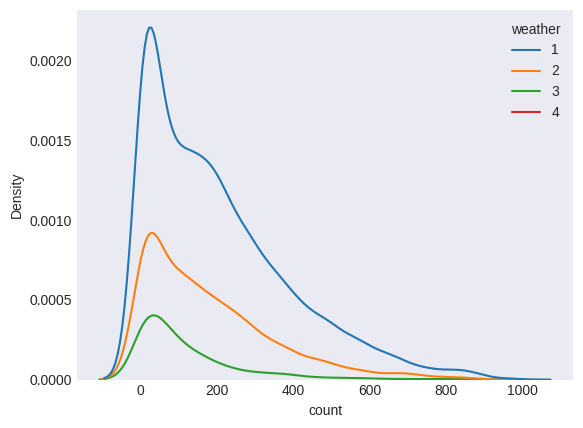

In [119]:
sns.kdeplot(data = data, x = 'count', hue = 'weather')
plt.show()

In [103]:
weather1 = data[data['weather'] == 1]['count']
weather2 = data[data['weather'] == 2]['count']
weather3 = data[data['weather'] == 3]['count']
weather4 = data[data['weather'] == 4]['count']

In [104]:
stat, p_value= stats.levene(weather1, weather2, weather3, weather4)
if p_value > 0.05:
  print('Variances of the samples are equal')
else:
  print('Variances of the samples are not equal')

Variances of the samples are not equal


- We see that out of the 3 assumptions for ANOVA one-way, two are failing.
- Hence we will resort to Kruskal Wallis to check this assumption - *whether Demand of bicycles on rent is the same for different Weather conditions*
- alpha= 0.05
- H0: There is no significant difference between demand of bicycles for different Weather conditions.
- Ha: There is a significant difference between demand of bicycles for different Weather conditions.

In [105]:
stat, p_value= stats.kruskal(weather1, weather2, weather3, weather4)
if p_value > 0.05:
  print('There is no significant difference between demand of bicycles for different Weather conditions')
else:
  print('There is a significant difference between demand of bicycles for different Weather conditions')


There is a significant difference between demand of bicycles for different Weather conditions


- From the above we can conclude:
  - The p_value is lesser than the significance level
  - Hence, **There is a significant difference between demand of bicycles for different Weather conditions.**


### Demand of bicycles on rent is the same for different Seasons?

In [106]:
data['season'].unique()

['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']

#### We will be using ANOVA one-way test to verify the same.
##### Assumptions for ANOVA one-way
- Data should be normally distributed - *we already saw that the data is not normaly distributed*
- Each data point should be independent of the other - *this condition is satisfied*
- Variances of samples should be the same - *need to test*

#### Testing for variances of samples using levene's test
- H0: Variance of the samples are equal
- Ha: Variance of teh samples are not equal
- significance level= 0.05

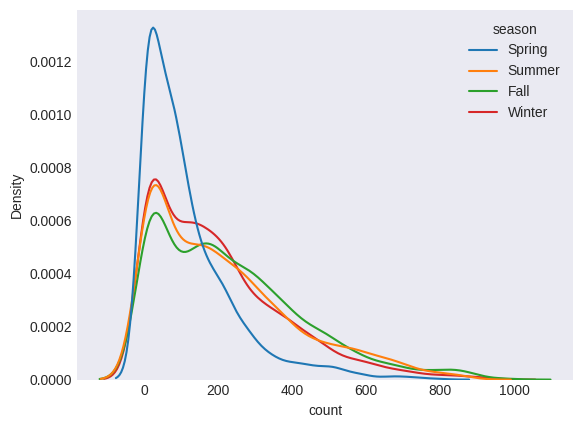

In [120]:
sns.kdeplot(data = data, x = 'count', hue = 'season')
plt.show()

In [107]:
spring = data[data['season'] == 'Spring']['count']
summer = data[data['season'] == 'Summer']['count']
fall = data[data['season'] == 'Fall']['count']
winter = data[data['season'] == 'Winter']['count']



In [108]:
stat, p_value= stats.levene(spring, summer, fall, winter)
if p_value > 0.05:
  print('Variances of the samples are equal')
else:
  print('Variances of the samples are not equal')


Variances of the samples are not equal


- We see that out of the 3 assumptions for ANOVA one-way, two are failing.
- We will still try ANOVA one-way and compare with Kruskal Wallis to check this assumption - *whether Demand of bicycles on rent is the same for different Seasons*
- alpha= 0.05
- H0: There is no significant difference between demand of bicycles for different Seasons.
- Ha: There is a significant difference between demand of bicycles for different Seasons.

#### Testing the assumption with ANOVA
  - H0: There is no significant difference between demand of bicycles for different Seasons.
  - Ha: There is a significant difference between demand of bicycles for different Seasons.
  - significance level= 0.05

In [109]:
stat, p_value= stats.f_oneway(spring, summer, winter, fall)
if p_value > 0.05:
  print('There is no significant difference between demand of bicycles for different Seasons')
else:
  print('There is a significant difference between demand of bicycles for different Seasons')

There is a significant difference between demand of bicycles for different Seasons


#### Testing the assumption with Krsukal Wallis
  - H0: There is no significant difference between demand of bicycles for different Seasons.
  - Ha: There is a significant difference between demand of bicycles for different Seasons.
  - significance level= 0.05

In [111]:
stat, p_value= stats.kruskal(spring, summer, winter, fall)
if p_value > 0.05:
  print('There is no significant difference between demand of bicycles for different Seasons')
else:
  print('There is a significant difference between demand of bicycles for different Seasons')

There is a significant difference between demand of bicycles for different Seasons


From both ANOVA one-way and Kruskal Wallis we comclude that:
- p_value is less than the significane level thus rejecting the null hypothesis
- There is a significant difference between demand of bicycles for different Seasons

#### Weather conditions are significantly different during different Seasons?

In [114]:
table= pd.crosstab(index= data['weather'],
            columns= data['season'])
table

season,Spring,Summer,Fall,Winter
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


#### We will use Chi-Squared Test for independence here
#### Hypothesis for chisquared test
- H0: Weather Conditions and Season are independent
- Ha: Weather Conditions and Season are dependent
- significance level= 0.05

In [115]:
stat, p_value,_,_= stats.chi2_contingency(table)
if p_value > 0.05:
  print('Weather Conditions and Season are independent')
else:
  print('Weather Conditions and Season are dependent')

Weather Conditions and Season are dependent


From the above test we conclude:
- p_values is less than significance level, thus rejecting the null hypothesis.
- Weather Conditions and Season are dependent on each other

### Recommendations
- More bikes should me made available during Summer and Fall season as the demand during this season is high compared to other seasons.
- Since there is no significant difference of bike rentals between working and non-working days there should be a proper deployment of resouces througout the week to ensure adequate resource allocation throughout the week.
- Since we see a dip in the rentals in the Spring season, more promotional offers should be provided to increase the rentals at this season.
- Since Weather and Season are significantly related, bike availability should be made considering both season and weather conditions together.
- Promotional campaigns should me used to attract more costumers during off-peak motnhs which is from October - January